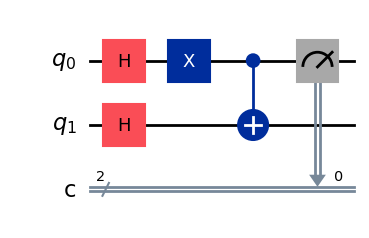

In [1]:
from qiskit import QuantumCircuit

circ_example = QuantumCircuit(2, 2)
circ_example.h(range(2))
circ_example.x(0)
circ_example.cx(0, 1)
circ_example.measure(0,0)
circ_example.draw(output="mpl")

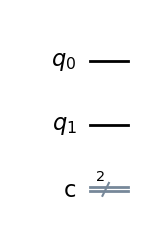

In [2]:
n_qubits = 2
n_classical_bits = 2

circuit = QuantumCircuit(n_qubits,n_classical_bits)
circuit.draw(output="mpl")

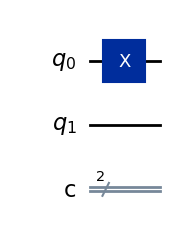

In [28]:
circuit = QuantumCircuit(n_qubits,n_classical_bits)
# add X to qubit 0
circuit.x(0)
circuit.draw(output="mpl")

In [22]:
from qiskit.quantum_info import Statevector

# we input a circuit and a number of samples, and obtain a dictionary of outcomes
def sample_circuit(circuit: QuantumCircuit) -> dict:
  n_shots = 1
  statevector = Statevector.from_instruction(circuit)
  outcomes = statevector.sample_counts(n_shots)
  return outcomes


# function that print all the outcomes
def print_outcomes(outcomes:dict):
  for bitstring,counts in outcomes.items():
    print(f"Obtained bitstring |{bitstring}> {counts} times.")

In [26]:
# we sample the circuit a 100 times, and see what the outcomes are

outcomes = sample_circuit(circuit)
#print_outcomes(outcomes)
x=100
for bitstring,counts in outcomes.items():
   x = max({counts})
print(x)

1


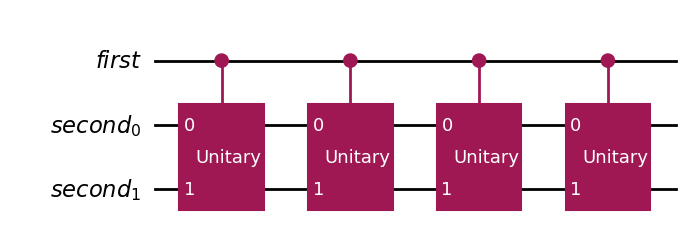

In [41]:
from typing import Iterable

import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from scipy.linalg import expm
from typing import Tuple

from qiskit import QuantumRegister

def random_unitary_iter(r2:int):
    r1 = 1
    rham = np.random.rand(2**r2,2**r2) + 1j*np.random.rand(2**r2,2**r2)
    rham += np.conj(np.transpose(rham))
    irham = 1j*rham
    for m in range(r1):
        rut=expm((2**m)*irham)
        rut/np.trace(rut)
        return rut

def controlled_U_gate(circ:QuantumCircuit, ctrl:int, targs:list, rut:np.ndarray, j:int)->None:
    rut_gate=UnitaryGate(rut)                    #geht das mit dem exponentieren wirklich so einfach?
    crut_gate = rut_gate.control(1)
    circ.append(crut_gate,qargs=[ctrl,*targs])

r1=1
r2=2

first_register=QuantumRegister(r1,"first")
second_register=QuantumRegister(r2,"second")

circ = QuantumCircuit(first_register,second_register)

unitary = random_unitary_iter(r2)

j = 2
for k in range(2**j):
    controlled_U_gate(circ=circ,ctrl=0,targs=second_register,rut=unitary, j=1)

circ.draw(output="mpl")